In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [14]:
arr = [[2,3,1,1],
       [1,2,2,1],
       [2,2,2,1],
       [3,2,2,1],
       [5,3,1,0],
       [6,2,2,0],
       [7,3,1,0],
       [8,2,2,0]]

In [16]:
data = np.array(sample_data)

X = data[:,:-1]
Y = data[:,-1]

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)
print(X_train)

[[0.14285714 1.         0.        ]
 [0.         0.         1.        ]
 [0.14285714 0.         1.        ]
 [0.28571429 0.         1.        ]
 [0.57142857 1.         0.        ]
 [0.71428571 0.         1.        ]
 [0.85714286 1.         0.        ]
 [1.         0.         1.        ]]


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
input_layer = layers.Input(shape=(3))
x = layers.Dense(32, activation='relu')(input_layer)
output_layer = layers.Dense(2, activation='sigmoid')(x)

model = keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)

In [23]:
model_history = model.fit(X_train,Y, epochs= 20)

Epoch 1/20
1/1 [==============================] - 0s 480ms/step - loss: 0.6942 - sparse_categorical_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6912 - sparse_categorical_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6881 - sparse_categorical_accuracy: 0.6250
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6851 - sparse_categorical_accuracy: 0.6250
Epoch 5/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6822 - sparse_categorical_accuracy: 0.6250
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6793 - sparse_categorical_accuracy: 0.6250
Epoch 7/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6764 - sparse_categorical_accuracy: 0.6250
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6735 - sparse_categorical_accuracy: 0.6250
Epoch 9/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6708 -

In [24]:
Y_predict = np.argmax(model.predict(X), axis=1)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 0])

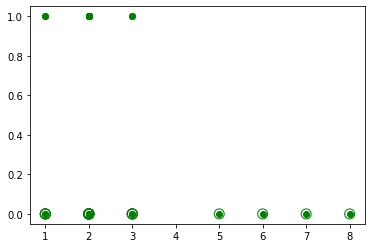

In [26]:
plt.scatter(X[:,0],Y, color = 'green')
plt.scatter(X[:,1],Y, color = 'green')
plt.scatter(X[:,2],Y, color = 'green')


plt.scatter(X[:,0],Y_predict, s = 100, marker = 'o',facecolors='none', edgecolors='g')
plt.scatter(X[:,1],Y_predict, s = 100, marker = 'o',facecolors='none', edgecolors='g')
plt.scatter(X[:,2],Y_predict, s = 100, marker = 'o',facecolors='none', edgecolors='g')

plt.show()